# Mini-Assignment 1: Inspecting the PubMed Paper Dataset

In this code for the first mini-assignment, we will get to know the dataset that we will be using throughout. You can find the assignment tasks at the very bottom of this document.

Our dataset consists of short texts (article abstracts) from the [PubMed](https://www.ncbi.nlm.nih.gov/pubmed/) database of scientific publications in the Life Science domain. As the full dataset consists of millions of documents, we are using just a small subset, namely all publications that contain the word "malaria" in their title or abstract. You can download that dataset in the form of four files (`malaria__Summaries.pkl.bz2`, etc.) from Blackboard. Save these four files in a directory called `data`, which should be a sub-directory of the one that contains this notebook file (or adjust the file path in the code)

## Loading the Dataset

In [1]:
import pickle, bz2

Summaries_file = 'data/malaria__Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/3/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword (like `var.year`), rather than index (like `var[2]`).

In [2]:
from collections import namedtuple

paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [3]:
Summaries[24130474]

paper(title='A network approach to analyzing highly recombinant malaria parasite genes.', authors=['Larremore DB', 'Clauset A', 'Buckee CO'], year=2013, doi='10.1371/journal.pcbi.1003268')

In [4]:
Summaries[24130474].title

'A network approach to analyzing highly recombinant malaria parasite genes.'

## Dataset Statistics

Plotting relies on [matplotlib](http://matplotlib.org/) and [NumPy](http://www.numpy.org/). If your installation doesn't have them included already, you can download them [here](http://matplotlib.org/downloads.html) and [here](http://sourceforge.net/projects/numpy/files/NumPy/1.10.1/), respectively.

In [5]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per Year

Here, we will get information on how many papers in the dataset were published per year.

We'll be using the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class to determine the number of papers per year.

In [6]:
from collections import Counter

paper_years = [ p.year for p in Summaries.values() ]
papers_per_year = sorted( Counter(paper_years).items() )

print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

Number of papers in the dataset per year for the past decade:
[(2007, 2245), (2008, 2317), (2009, 2482), (2010, 2707), (2011, 2994), (2012, 3233), (2013, 3352), (2014, 3588), (2015, 3627), (2016, 3127)]


Filtering results, to obain only papers since 1940:

In [7]:
papers_per_year_since_1940 = [ (y,count) for (y,count) in papers_per_year if y >= 1940 ]
years_since_1940 = [ y for (y,count) in papers_per_year_since_1940 ]
nr_papers_since_1940 = [ count for (y,count) in papers_per_year_since_1940 ]

print('Number of papers in the dataset published since 1940:')
print(sum(nr_papers_since_1940))

Number of papers in the dataset published since 1940:
66736


Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

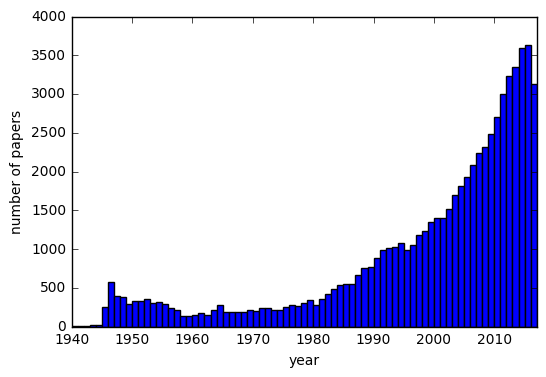

In [8]:
plt.bar(left=years_since_1940, height=nr_papers_since_1940, width=1.0)
plt.xlim(1940, 2017)
plt.xlabel('year')
plt.ylabel('number of papers');

Alternatively, you can get the same result in a more direct manner by plotting it as a histogram with [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist):

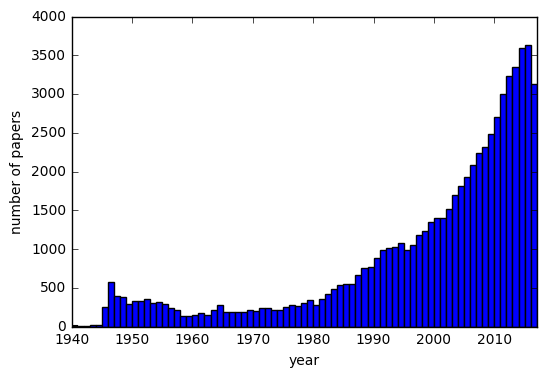

In [9]:
plt.hist( x=[p.year for p in Summaries.values()], bins=range(1940,2018) );
plt.xlim(1940, 2017)
plt.xlabel('year')
plt.ylabel('number of papers');

### Papers per Author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [10]:
# flattening the list of lists of authors:
authors_expanded = [ auth for paper in Summaries.values() for auth in paper.authors ]

nr_papers_by_author = Counter( authors_expanded )

In [11]:
print('Number of authors in the dataset with distinct names:')
print(len(nr_papers_by_author))

Number of authors in the dataset with distinct names:
114572


In [12]:
print('Top 50 authors with greatest number of papers:')
print(sorted(nr_papers_by_author.items(), key=lambda i:i[1], reverse=True)[:50])

Top 50 authors with greatest number of papers:
[('White NJ', 640), ('Looareesuwan S', 417), ('Marsh K', 357), ('Nosten F', 331), ('Kremsner PG', 323), ('Snow RW', 296), ('Greenwood BM', 276), ('Miller LH', 265), ('Hoffman SL', 257), ('Rosenthal PJ', 254), ('Hill AV', 243), ('Tanner M', 220), ("D'Alessandro U", 212), ('Mueller I', 204), ('Rogier C', 202), ('Collins WE', 196), ('Doumbo OK', 194), ('Deloron P', 190), ('Kain KC', 184), ('Day NP', 182), ('Cowman AF', 177), ('Dorsey G', 169), ('Druilhe P', 169), ('Holder AA', 168), ('Kumar S', 167), ('Molyneux ME', 167), ('Trape JF', 167), ('Sauerwein RW', 167), ('Greenwood B', 166), ('Theander TG', 164), ('Riley EM', 162), ('Davis TM', 162), ('Troye-Blomberg M', 161), ('Good MF', 160), ('Björkman A', 158), ('Yan G', 158), ('Le Bras J', 156), ('Dondorp AM', 154), ('Alonso PL', 153), ('Taylor TE', 152), ('Anstey NM', 150), ('Sinden RE', 147), ('Beier JC', 146), ('Plowe CV', 145), ('Wilairatana P', 144), ('Hviid L', 142), ('Barnwell JW', 142),

Creating a histogram to visualize the results:

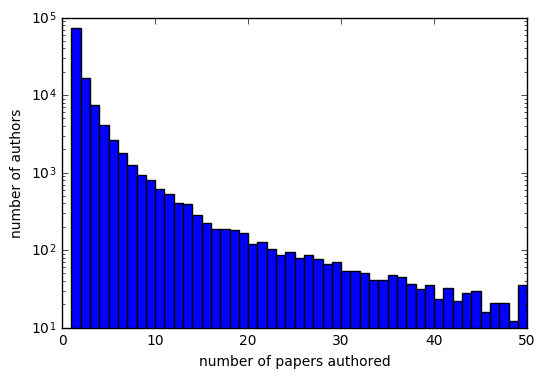

In [13]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(51), log=True )
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');

### Authors per Paper

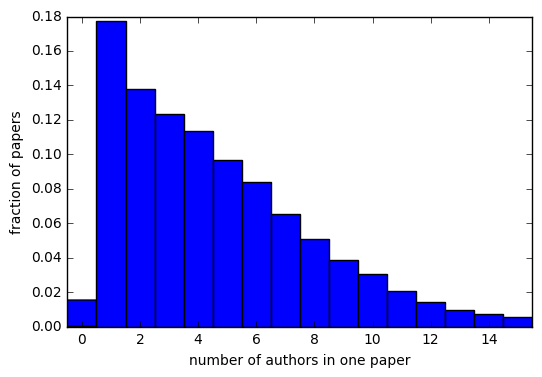

In [14]:
plt.hist( x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), align='left', normed=True )
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(-0.5, 15.5);

### Words in Titles

assemble list of words in paper titles, convert them to lowercase, and remove trailing '.':

In [15]:
words = [ word.lower() for paper in Summaries.values() for word in paper.title.split(' ') ]
word_counts = Counter(words)

print('Number of distinct words in the paper titles:')
print(len(word_counts))

Number of distinct words in the paper titles:
59230


----------

# Assignments

**Your name:** ...

### Task 1

Create a Python dictionary object that returns sets of author names for a given year. You can name this dictionary, for example, `authors_at_year`. (You can use a [*defaultdict*](https://docs.python.org/3/library/collections.html#collections.defaultdict) with a default value of [*set*](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).) Demonstrate the working of this dictionary by showing the author set for the year 1941.

In [ ]:
# Add your code here

### Task 2

Based on the dictionary `authors_at_year` from exercise 1 above, create a plot for the years from 1940 until 2016 that shows how many authors published at least one paper. (You can retrieve the number of unique items in a set `s` with `len(s)`.)

In [ ]:
# Add your code here

### Task 3

Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 100 most frequent words in titles of papers, from most frequent to least frequent. (You can make use of the data structures created above.)

In [ ]:
# Add your code here

### Task 4

Print out the top 50 most often occurring words in the paper's titles. (You can again make use of the data structures created above.)

In [ ]:
# Add your code here

### Task 5

While keeping in mind that we are dealing with a biased (preselected) dataset about malaria-related papers, what do you notice when looking at the top 10 most frequent words?

**Answer:** [_Write your answer text here_]

# Submission

Submit the answers to the assignment as a modified version of this Notebook file (file with `.ipynb` extension) that includes your code and your answers via Blackboard. Don't forget to add your name, and remember that the assignments have to be done individually and group submissions are **not allowed**.